In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
%matplotlib inline

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ph_df = pd.read_csv("/content/drive/MyDrive/EC439/ph_df.csv")

In [ ]:
ph_df.head()

,Exchange Date,Close,Company name,Fraud
0,27-ก.ย.-2024,0.96,AKR,0
1,20-ก.ย.-2024,0.95,AKR,0
2,13-ก.ย.-2024,0.94,AKR,0
3,06-ก.ย.-2024,0.93,AKR,0
4,30-ส.ค.-2024,0.90,AKR,0


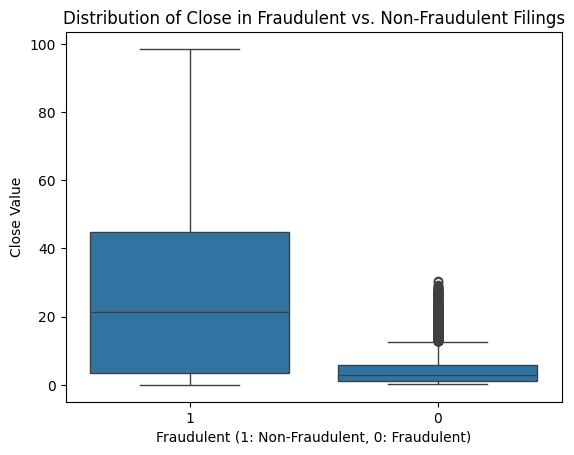

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=ph_df, x='Fraud', y='Close', order=[1, 0])  # Specify order for correct labels
plt.title('Distribution of Close in Fraudulent vs. Non-Fraudulent Filings')
plt.xlabel('Fraudulent (1: Non-Fraudulent, 0: Fraudulent)')
plt.ylabel('Close Value')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def normalize_by_group(df, group_col, cols_to_normalize):
    """
    Normalizes specified columns within groups of a DataFrame.

    Args:
        df: DataFrame to normalize.
        group_col: Column name to group by.
        cols_to_normalize: List of column names to normalize.

    Returns:
        DataFrame with normalized columns.
    """

    # Create a copy of the DataFrame to avoid modifying the original
    df_normalized = df.copy()

    # Group the DataFrame by the specified column
    for group, group_data in df_normalized.groupby(group_col):
        # Create a MinMaxScaler object
        scaler = MinMaxScaler()

        # Fit the scaler to the group data for the specified columns
        scaler.fit(group_data[cols_to_normalize])

        # Transform the group data and update the original DataFrame
        df_normalized.loc[group_data.index, cols_to_normalize] = scaler.transform(group_data[cols_to_normalize])

    return df_normalized

# Normalize 'Close' column in ph_df, grouped by 'Company name'
ph_df_normalized = normalize_by_group(ph_df, 'Company name', ['Close'])

# Display the normalized DataFrame
ph_df_normalized.head()

,Exchange Date,Close,Company name,Fraud
0,27-ก.ย.-2024,0.224265,AKR,0
1,20-ก.ย.-2024,0.220588,AKR,0
2,13-ก.ย.-2024,0.216912,AKR,0
3,06-ก.ย.-2024,0.213235,AKR,0
4,30-ส.ค.-2024,0.202206,AKR,0


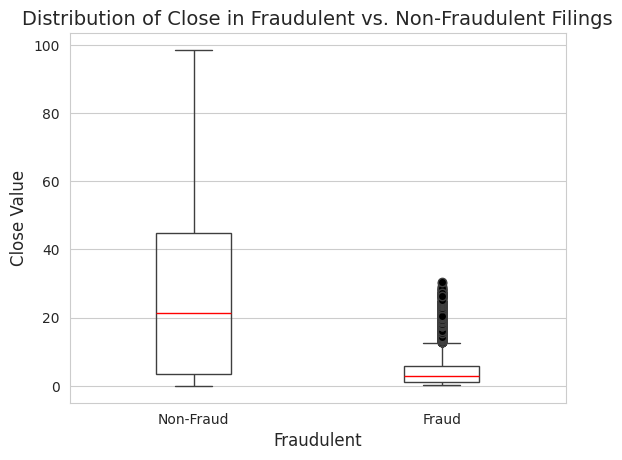

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# สร้าง box plot พร้อมกล่องโปร่งใสและผอมลง
sns.boxplot(data=ph_df, x='Fraud', y='Close', order=[1, 0],
            boxprops={'facecolor':'none'},  # ทำให้กล่องโปร่งใส
            medianprops={'color':'red'}, # เปลี่ยนสี median เป็นสีแดง
            flierprops={'markerfacecolor':'black', 'marker':'o'}, # ปรับแต่ง outlier markers
            width=0.3)  # ปรับความกว้างของกล่อง (0.3 ในตัวอย่างนี้)

# Apply the Seaborn style before plotting with Matplotlib
sns.set_style("whitegrid") # Use seaborn.set_style to set the 'whitegrid' style

# ปรับแต่งชื่อแกนและชื่อกราฟ
plt.title('Distribution of Close in Fraudulent vs. Non-Fraudulent Filings', fontsize=14)
plt.xlabel('Fraudulent', fontsize=12)
plt.ylabel('Close Value', fontsize=12)

# เปลี่ยน 0 และ 1 เป็น Non-Fraud และ Fraud
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])

# แสดงกราฟ
plt.show()

In [ ]:
# !pip install python-dateutil
# import pandas as pd
# from dateutil import parser

# def parse_thai_date(date_str):
#     """
#     Parses Thai dates in the format 'dd-mmm-yyyy'
#     where mmm is the Thai abbreviation for the month.
#     """
#     # Replace Thai month abbreviations with English equivalents
#     thai_months = {
#         "ม.ค.": "Jan", "ก.พ.": "Feb", "มี.ค.": "Mar", "เม.ย.": "Apr",
#         "พ.ค.": "May", "มิ.ย.": "Jun", "ก.ค.": "Jul", "ส.ค.": "Aug",
#         "ก.ย.": "Sep", "ต.ค.": "Oct", "พ.ย.": "Nov", "ธ.ค.": "Dec"
#     }
#     for thai, eng in thai_months.items():
#         date_str = date_str.replace(thai, eng)

#     return parser.parse(date_str).strftime('%Y-%m-%d') # Convert back to standard format

# # Apply the parsing function to the 'Exchange Date' column
# ph_df['Exchange Date'] = ph_df['Exchange Date'].apply(parse_thai_date)

In [ ]:
# def prepare_group(group_df):
#   # ... (คำนวณ features อื่นๆ) ...
#   # คำนวณ Moving Average 4 วัน
#   group_df['MA_4'] = group_df['Close'].rolling(window=4).mean()
#   # ... (คำนวณ features อื่นๆ) ...
#   return group_df

# grouped_data = ph_df.groupby('Company name')
# prepared_df = grouped_data.apply(prepare_group)
# prepared_df = prepared_df.reset_index(drop=True)

<ipython-input-8-367ed134cd3b>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  prepared_df = grouped_data.apply(prepare_group)


In [ ]:
# def prepare_group(group_df):
#   # ... (คำนวณ features อื่นๆ) ...
#   # ทำให้ข้อมูลเป็น stationary (first difference)
#   group_df['Close_diff'] = group_df['Close'].diff()
#   # ... (คำนวณ features อื่นๆ) ...
#   return group_df

# grouped_data = prepared_df.groupby('Company name')
# prepared_df = grouped_data.apply(prepare_group)
# prepared_df = prepared_df.reset_index(drop=True)
# prepared_df = prepared_df.dropna()  # ลบ rows ที่มี missing values

<ipython-input-15-01fbb20b030d>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  prepared_df = grouped_data.apply(prepare_group)
